In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000834285"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000834285
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,REPUBLIC FIRST BANCORP INC
Ticker,FRBK


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,26.0,6.026538e+00,1.979032e+00,2.5,3.47,7.18,7.477500e+00,7.87
interest income,27.0,1.425319e+07,5.368118e+06,9107000.0,9652000.00,12406000.00,1.762650e+07,25519000.00
net income,54.0,5.059259e+04,3.850878e+06,-23078000.0,213000.00,1009000.00,1.922750e+06,2738000.00
net interest income,54.0,9.851167e+06,3.757980e+06,6792000.0,7510250.00,8137000.00,1.073825e+07,19980000.00
provision for loan losses,51.0,1.318706e+06,2.518747e+06,-10000.0,55000.00,400000.00,8.875000e+05,10750000.00
total revenue,34.0,1.429559e+07,7.396423e+06,5755000.0,8328000.00,11595000.00,1.969300e+07,30181000.00


# Plots

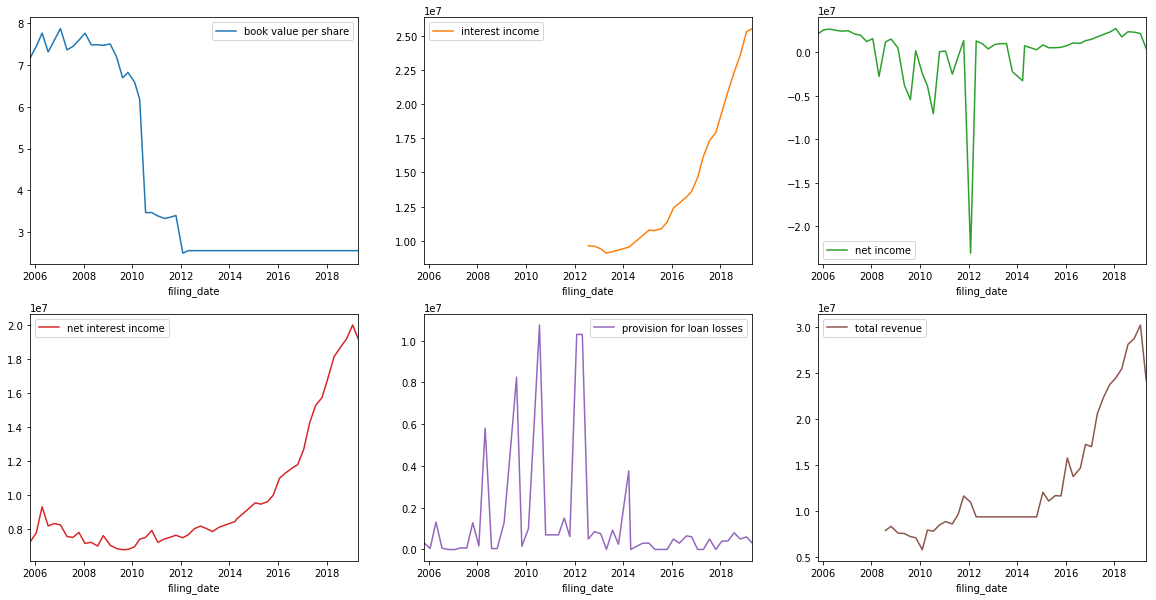

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000834285 book value per share                             2008Q2  missing   
           book value per share       2012Q2 to 2019Q1: 28 periods  missing   
           interest income            2005Q3 to 2012Q1: 27 periods  missing   
           interest income                                  2014Q2  missing   
           net income                                       2014Q2  missing   
           net interest income                              2014Q2  missing   
           provision for loan losses   2010Q4 to 2011Q1: 2 periods  missing   
           provision for loan losses                        2012Q1  missing   
           provision for loan losses                        2014Q2  missing   
           total revenue              2005Q3 to 2008Q1: 11 periods  missing   
           total revenue              2012Q2 to 2014Q3: 10 periods  missing   

                                             message  
cik        item                                       
0000834285 book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()